In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import plotly.express as px

import math
import os
import datetime

plt.style.use('seaborn')
sns.set(font_scale=1) 
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [4]:
data = pd.read_csv("/content/drive/MyDrive/TR_코로나 데이터분석/owid-covid-data.csv")
# 출처: https://github.com/owid/covid-19-data/tree/master/public/data

### 데이터 기본 형태

In [5]:
data.shape

(115477, 62)

In [6]:
data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.025,0.025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.025,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.025,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.025,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.025,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115477 entries, 0 to 115476
Data columns (total 62 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   iso_code                               115477 non-null  object 
 1   continent                              110187 non-null  object 
 2   location                               115477 non-null  object 
 3   date                                   115477 non-null  object 
 4   total_cases                            109863 non-null  float64
 5   new_cases                              109860 non-null  float64
 6   new_cases_smoothed                     108845 non-null  float64
 7   total_deaths                           99252 non-null   float64
 8   new_deaths                             99407 non-null   float64
 9   new_deaths_smoothed                    108845 non-null  float64
 10  total_cases_per_million                109283 non-null  

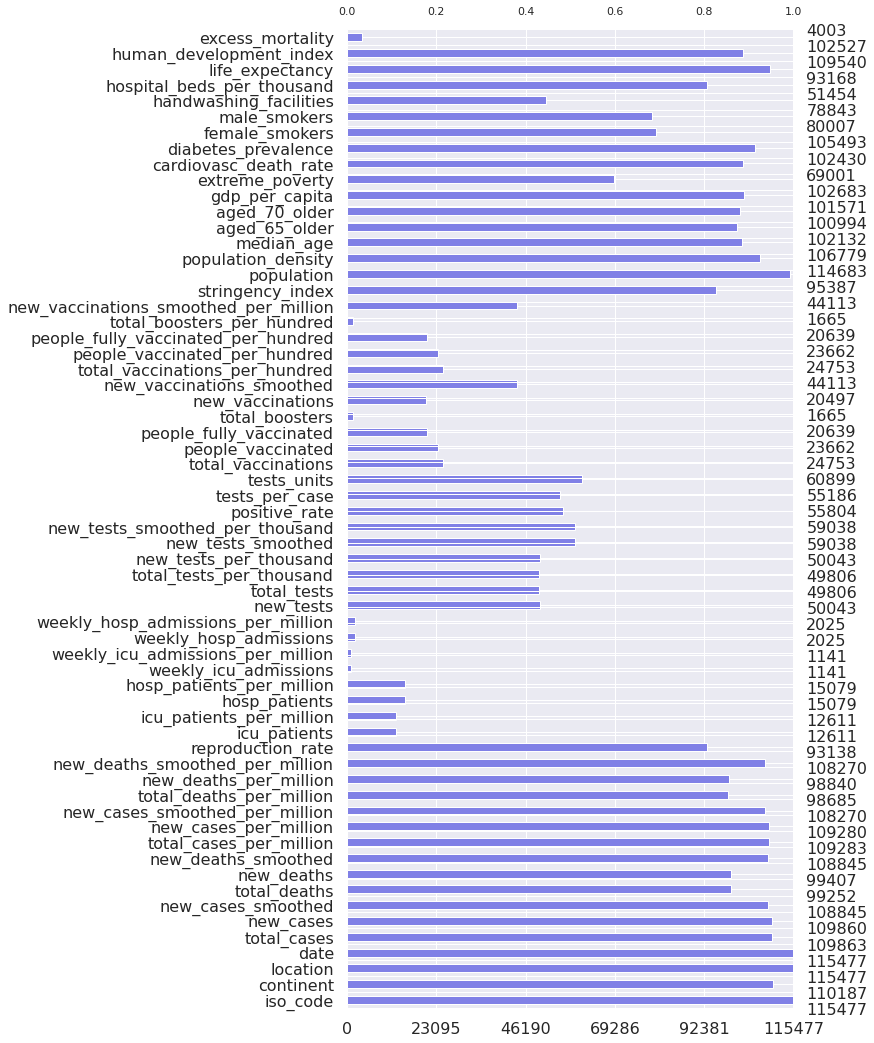

In [9]:
msno.bar(df=data.iloc[:, :], figsize=(8, 18), color=(0.5, 0.5, 0.9))

In [10]:
# duplicate data
duplicate = data.duplicated()
print(duplicate.sum())

0


In [11]:
len(data['iso_code'].unique())

233

In [12]:
# data type 
data['date'] = pd.to_datetime(data['date'])
int_cols = ['total_cases', 'new_cases','total_deaths', 'new_deaths',
        'icu_patients', 'hosp_patients', 'new_tests', 'total_tests', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'population']
for col in int_cols:
    data['{}'.format(col)] = data['{}'.format(col)].fillna(0).astype(int)

In [13]:
print('data period: {} ~ {} '.format(data['date'].min(), data['date'].max()))

data period: 2020-01-01 00:00:00 ~ 2021-09-09 00:00:00 


### 전체 EDA

- iso_code	ISO 3166-1 alpha-3 – 3자리 국가 코드
- continent	지리적 위치의 대륙
- location	지리적 위치
- date	관찰 날짜
- population	2020년 인구
- population_density	평방 킬로미터로 측정한 토지 면적으로 나눈 사람 수(가장 최근 연도)
- median_age	인구의 중위 연령, 2020년 UN 전망
- aged_65_older	65세 이상 인구 비율(가장 최근 연도)
- aged_70_older	2015년 기준 70세 이상 인구 비율
- gdp_per_capita	구매력 평가 기준 국내 총생산(2011년 국제 달러 고정), 가장 최근 연도 사용 가능
- extreme_poverty	극빈층 인구 비율, 2010년 이후 가장 최근 연도
- cardiovasc_death_rate	2017년 심혈관 질환 사망률(인구 10만 명당 연간 사망자 수)
- diabetes_prevalence	2017년 당뇨병 유병률(20~79세 인구의 %)
- female_smokers	흡연하는 여성의 비율(가장 최근 연도)
- male_smokers	흡연하는 남성의 비율(가장 최근 연도)
- handwashing_facilities	구내에 기본적인 손 씻기 시설을 갖춘 인구 비율(가장 최근 연도)
- hospital_beds_per_thousand	인구 1,000명당 병상, 2010년 이후 이용 가능한 가장 최근 연도
- life_expectancy	2019년 출생 시 기대 수명
- human_development_index	인간 발달의 세 가지 기본 차원(장수하고 건강한 삶, 지식 및 적절한 생활 수준)에서 평균 성취도를 측정하는 종합 지수. ( 2019년 값)
- excess_mortality	모든 연령대에 대한 초과 사망률 P-점수

In [14]:
continent = data['continent'].unique().tolist()
continent.remove(np.nan)

In [15]:
continent

['Asia', 'Europe', 'Africa', 'North America', 'South America', 'Oceania']

In [16]:
data[data['continent'].isnull()].shape

(5290, 62)

In [17]:
data[data['location'].isin(continent)].shape

(3519, 62)

In [18]:
data.loc[data['location'].isin(continent), 'continent'] = data['location']
data[data['continent'].isnull()].shape

(1771, 62)

In [23]:
World_data = data[data['location']=='World']
data.drop(index=data[data['location']=='World'].index, inplace=True)

In [31]:
data[data['continent'].isnull()].location.unique()

array(['European Union', 'International'], dtype=object)

In [27]:
len(data[~data['continent'].isnull()].location.unique())

230

### continent
- 'Asia', 'Europe', 'Africa', 'North America', 'South America', 'Oceania'

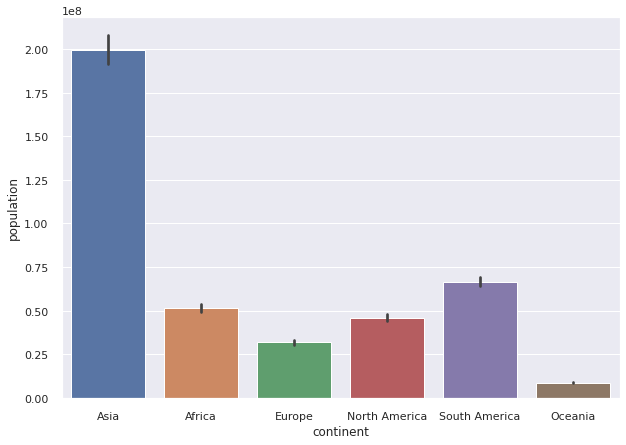

In [42]:
plt.figure(figsize= (10,7))
sns.barplot(x='continent', y='population', data=data)

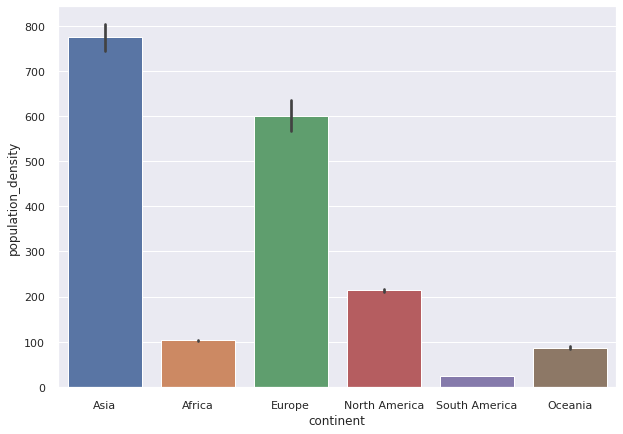

In [58]:
plt.figure(figsize= (10,7))
sns.barplot(x='continent', y='population_density', data=data)

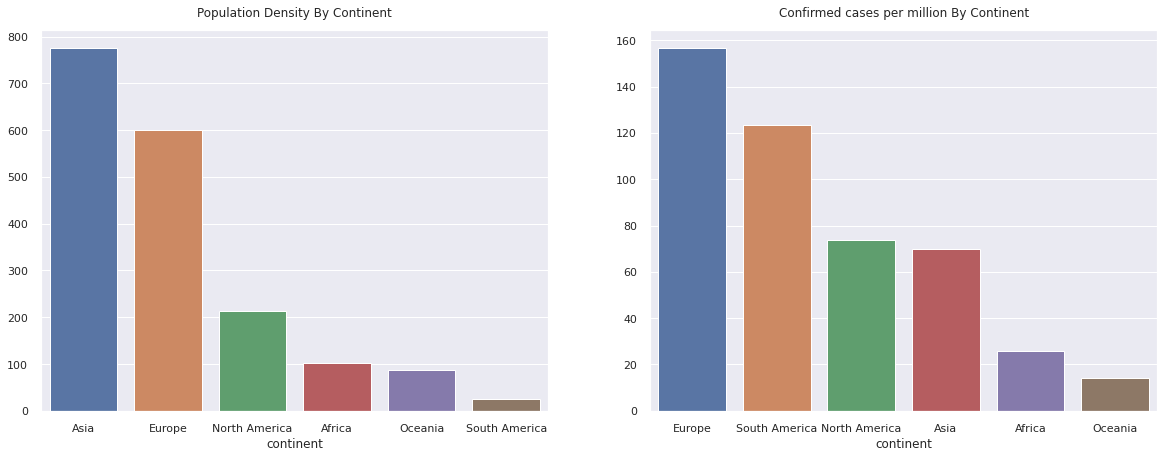

In [61]:
y_position = 1.02
f, ax = plt.subplots(1, 2, figsize=(20, 7))

x = data.groupby("continent")["population_density"].mean().sort_values(ascending= False)
sns.barplot(x.index, x.values, ax=ax[0])
ax[0].set_title('Population Density By Continent', y=y_position)

x = data.groupby("continent")["new_cases_per_million"].mean().sort_values(ascending= False)
sns.barplot(x.index, x.values, ax=ax[1])
ax[1].set_title('Confirmed cases per million By Continent', y=y_position)
plt.show()

In [62]:
data['population_density'].median()

85.12899999999999

In [63]:
pop_density_med = data['population_density'].median()
data.loc[data['population_density'] <= pop_density_med, 'density'] = 'low'
data.loc[data['population_density'] >  pop_density_med, 'density'] = 'high'

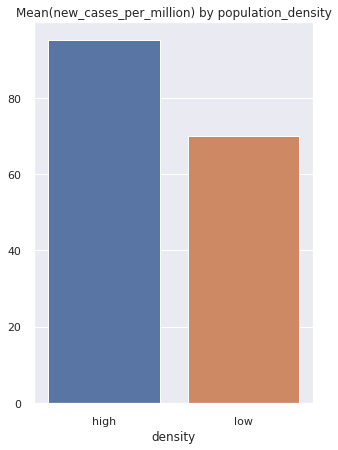

In [64]:
x = data.groupby("density")["new_cases_per_million"].mean().sort_values(ascending= False).head(10)
plt.figure(figsize= (5,7))
ax= sns.barplot(x.index, x.values)
plt.title("Mean(new_cases_per_million) by population_density")
plt.show()

> 밀집도가 높은 나라가 대체로 확진자 수가 많은 경향이 있지만, Asia와 South America를 보면 대륙의 특성이나 문화적인 요인이 있어 보인다.

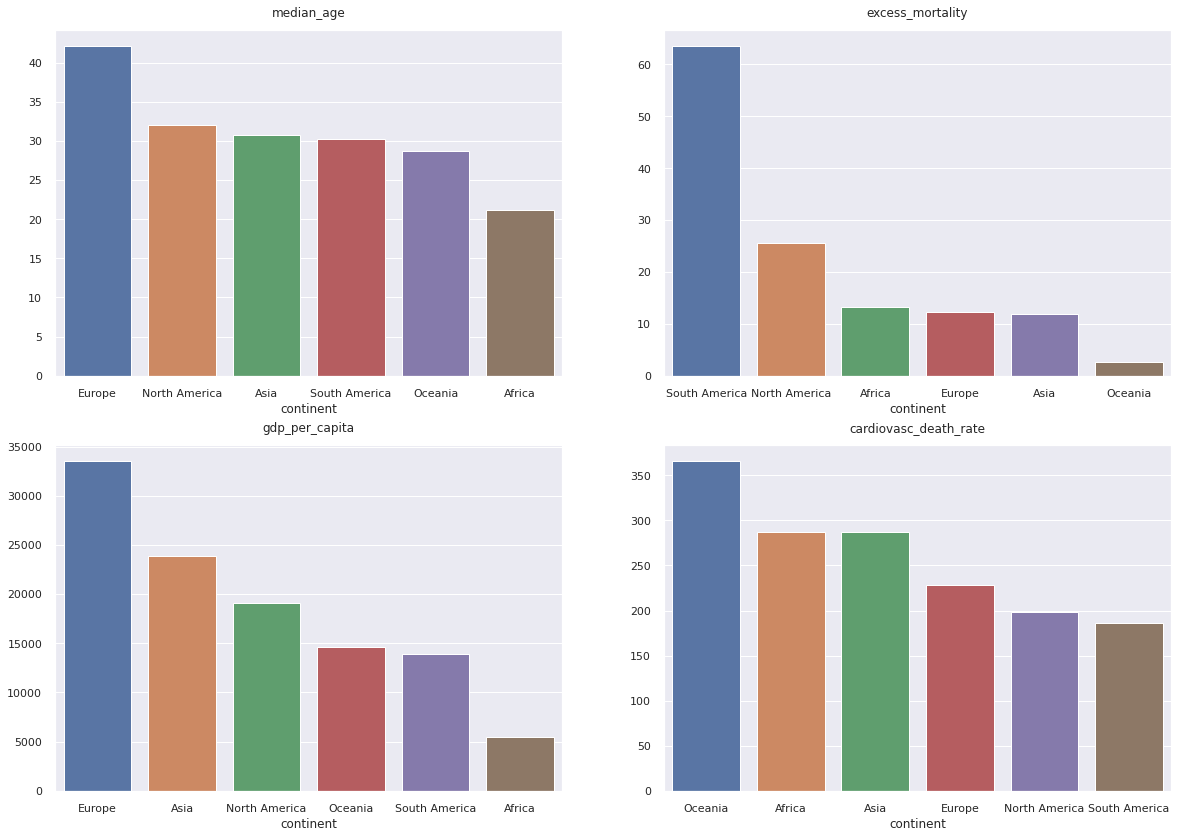

In [79]:
y_position = 1.02
f, ax = plt.subplots(2, 2, figsize=(20, 14))
x = data.groupby("continent")["median_age"].mean().sort_values(ascending= False)
sns.barplot(x.index, x.values, ax=ax[0][0])
ax[0][0].set_title("median_age", y=y_position) #인구의 중위 연령, 2020년 UN 전망

x = data.groupby("continent")["excess_mortality"].mean().sort_values(ascending= False)
sns.barplot(x.index, x.values, ax=ax[0][1])
ax[0][1].set_title("excess_mortality", y=y_position) #모든 연령대에 대한 초과 사망률 P-점수

x = data.groupby("continent")["gdp_per_capita"].mean().sort_values(ascending= False)
sns.barplot(x.index, x.values, ax=ax[1][0])
ax[1][0].set_title("gdp_per_capita", y=y_position) #구매력 평가 기준 국내 총생산(2011년 국제 달러 고정)

x = data.groupby("continent")["cardiovasc_death_rate"].mean().sort_values(ascending= False)
sns.barplot(x.index, x.values, ax=ax[1][1])
ax[1][1].set_title("cardiovasc_death_rate", y=y_position) #2017년 심혈관 질환 사망률(인구 10만 명당 연간 사망자 수)

plt.show()


> 오히려 심혈관 질환 사망률이 높은 대륙이 코로나 확진자가 적은 경향을 띄는 것 같다..?

### 시간에 따른 추세

In [120]:
def graph(df ,title):
    plt.figure(figsize=(14, 7))

    for col in df.columns:
        plt.plot(df.loc[:][col], label=col)

    plt.title(title, fontsize=20)
    plt.grid(alpha=0.3)
    plt.legend()
    plt.show()  

In [87]:
data.reset_index(drop=True, inplace=True)

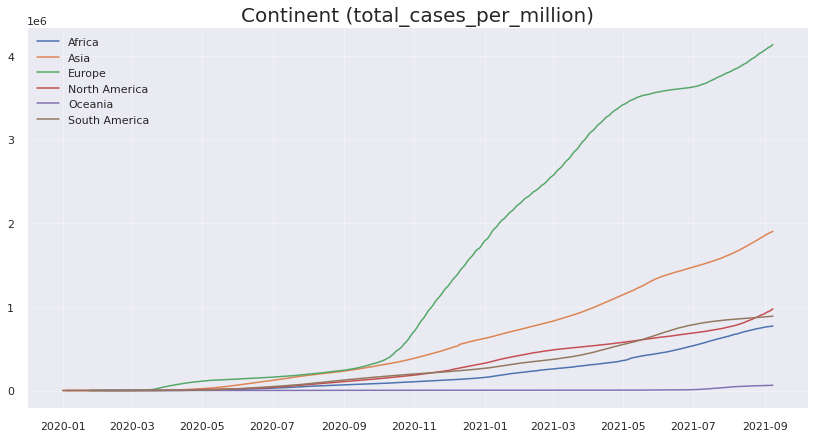

In [122]:
pivot_df = pd.DataFrame(data.groupby(['date','continent'])['total_cases_per_million'].sum().unstack())[:-1]
graph(pivot_df ,"Continent (total_cases_per_million)")

In [117]:
pivot_df = pd.DataFrame(data.groupby(['date','continent'])['new_cases_smoothed_per_million'].sum().unstack())
pivot_df

continent,Africa,Asia,Europe,North America,Oceania,South America
date,,,,,,
2020-01-01,NaN,NaN,NaN,0.000,NaN,0.000
2020-01-02,NaN,NaN,NaN,0.000,NaN,0.000
2020-01-03,NaN,NaN,NaN,0.000,NaN,0.000
2020-01-04,NaN,0.000,NaN,0.000,NaN,0.000
2020-01-05,NaN,0.000,NaN,0.000,NaN,0.000
...,...,...,...,...,...,...
2021-09-05,2498.289,7945.367,9247.561,6597.185,400.742,1194.595
2021-09-06,2195.469,7579.870,9077.194,6932.450,394.232,1164.261
2021-09-07,2207.237,7569.725,9281.424,7659.580,343.192,1192.228


In [118]:
# 21.09.09 drop
pivot_df = pivot_df[:-1]

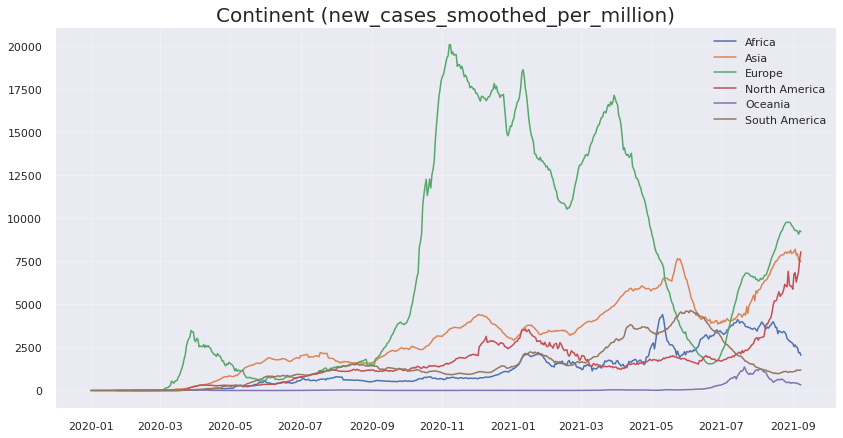

In [121]:
graph(pivot_df ,"Continent (new_cases_smoothed_per_million)")

## 누적 확진 Top 20 국가

In [373]:
grp = data.groupby('iso_code')
grp_top20 = grp['total_cases'].max().sort_values(ascending=False).head(20)
top20_cols = grp_top20.index.tolist()

In [374]:
top20_cols.append('KOR')

In [112]:
gr_df = data.pivot(index="date", columns="location", values="total_cases")

In [113]:
gr_df

location,Afghanistan,Africa,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,Aruba,Asia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bermuda,Bhutan,Bolivia,Bonaire Sint Eustatius and Saba,Bosnia and Herzegovina,Botswana,Brazil,British Virgin Islands,Brunei,Bulgaria,Burkina Faso,Burundi,Cambodia,Cameroon,Canada,Cape Verde,Cayman Islands,...,South Africa,South America,South Korea,South Sudan,Spain,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,Syria,Taiwan,Tajikistan,Tanzania,Thailand,Timor,Togo,Tokelau,Tonga,Trinidad and Tobago,Tunisia,Turkey,Turkmenistan,Turks and Caicos Islands,Tuvalu,Uganda,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Vatican,Venezuela,Vietnam,Wallis and Futuna,Yemen,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-05,153375.0,7914377.0,150997.0,198004.0,15055.0,48656.0,NaN,1870.0,5203802.0,245025.0,0.0,71311214.0,63155.0,696905.0,442872.0,18694.0,273008.0,1514456.0,5349.0,490926.0,1192008.0,16750.0,16946.0,NaN,2596.0,492680.0,NaN,216124.0,159317.0,20890779.0,NaN,3093.0,462033.0,13841.0,12585.0,95300.0,84210.0,1522625.0,35928.0,0.0,...,2819945.0,37046966.0,261778.0,11500.0,4877755.0,462767.0,37886.0,30855.0,1130525.0,785696.0,28543.0,16019.0,17313.0,1367.0,1280534.0,17618.0,22562.0,NaN,NaN,45714.0,674047.0,6498024.0,NaN,NaN,NaN,120581.0,2397758.0,723263.0,7010540.0,39944992.0,385660.0,159871.0,4.0,27.0,339255.0,524307.0,NaN,8108.0,207114.0,125550.0
2021-09-06,153534.0,7931485.0,151499.0,198313.0,15069.0,48790.0,NaN,1878.0,5207695.0,245264.0,0.0,71506230.0,64621.0,697510.0,445278.0,18853.0,273113.0,1517166.0,5417.0,492399.0,1196656.0,16950.0,16946.0,NaN,2596.0,492680.0,NaN,217362.0,162186.0,20899933.0,NaN,3464.0,462710.0,13851.0,12585.0,95828.0,84210.0,1523668.0,36012.0,0.0,...,2824063.0,37063409.0,263374.0,11526.0,4887112.0,465949.0,37873.0,31012.0,1130525.0,785696.0,2867

In [379]:
# 9/9 drop
gr_df = gr_df[:-1]

### 누적 확진 추이 그래프

### 신규 확진 추이 그래프

In [384]:
new_gr_df = top20.pivot(index="date", columns="location", values="new_cases_smoothed")

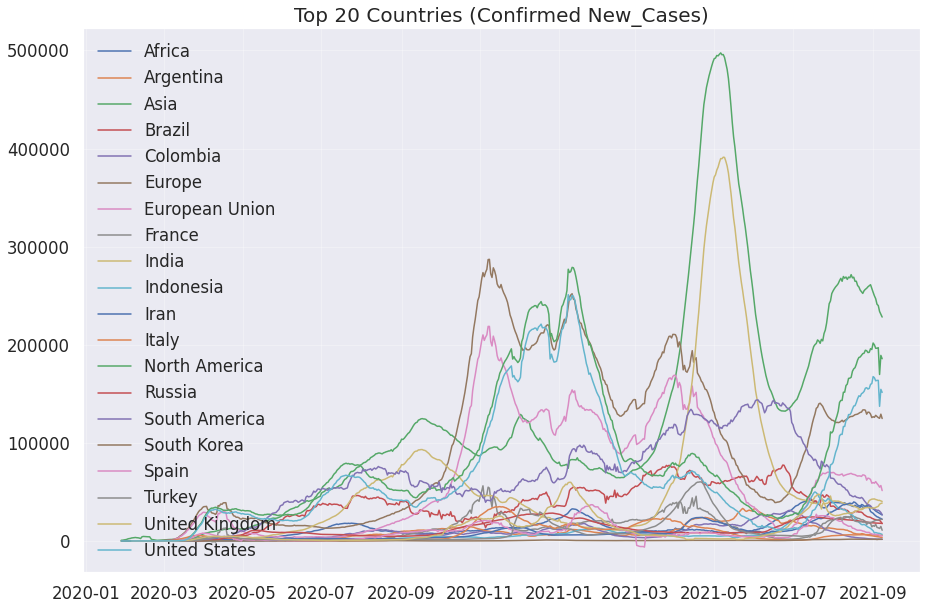

In [385]:
graph(new_gr_df.drop(['World'], axis=1) ,"Top 20 Countries (Confirmed New_Cases)")

In [386]:
data[data['new_cases']<0].head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality,density
3679,ATG,North America,Antigua and Barbuda,2020-07-03,68,-1,0.429,3,0,0.0,688.761,-10.129,4.341,30.387,0.000,0.0,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98728,231.845,32.1,6.933,4.631,21490.943,NaN,191.511,13.17,NaN,NaN,NaN,3.80,77.02,0.778,NaN,high
3989,ATG,North America,Antigua and Barbuda,2021-05-09,1231,-1,-0.143,32,0,0.0,12468.601,-10.129,-1.447,324.123,0.000,0.0,0.41,0,NaN,0,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,76.0,NaN,NaN,NaN,NaN,770.0,NaN,98728,231.845,32.1,6.933,4.631,21490.943,NaN,191.511,13.17,NaN,NaN,NaN,3.80,77.02,0.778,NaN,high
11699,BEN,Africa,Benin,2020-05-19,130,-209,-28.143,2,0,0.0,10.441,-16.786,-2.260,0.161,0.000,0.0,1.11,0,NaN,0,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,57.41,12451031,99.110,18.8,3.244,1.942,2064.236,49.6,235.848,0.99,0.6,12.3,11.035,0.50,61.77,0.545,NaN,high
21890,CHN,Asia,China,2020-06-03,83067,-1,3.857,4634,0,0.0,57.517,-0.001,0.003,3.209,0.000,0.0,1.22,0,NaN,0,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,78.24,1444216102,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.761,NaN,high
22306,CHN,Asia,China,2021-07-24,92587,-3,40.857,4636,-3,0.0,64.109,-0.002,0.028,3.210,-0.002,0.0,1.45,0,NaN,0,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1538707000,0,0,0,13810000,13040000.0,106.54,NaN,NaN,NaN,9029.0,NaN,1444216102,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.761,NaN,high


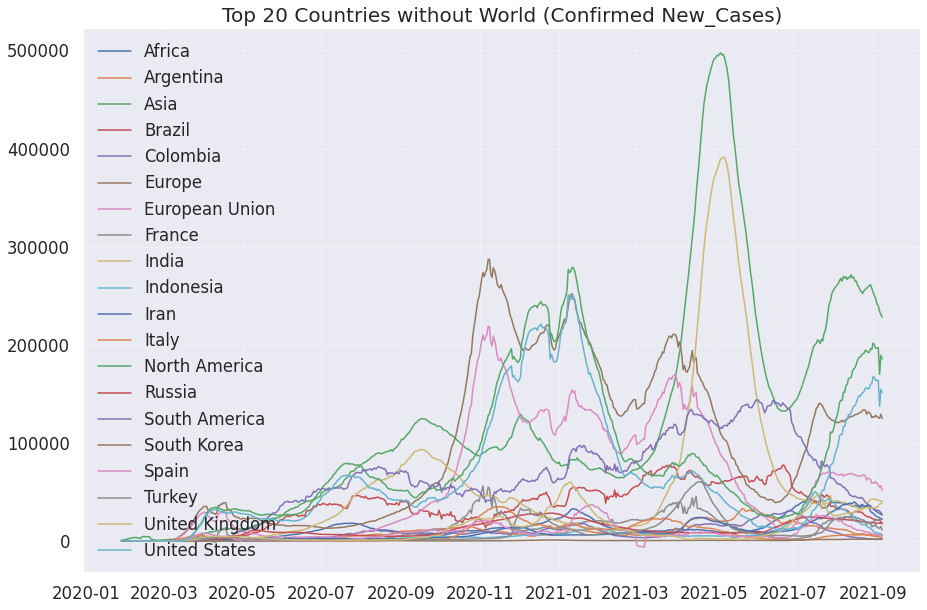

In [387]:
graph(new_gr_df.drop(['World'], axis=1) ,"Top 20 Countries without World (Confirmed New_Cases)")

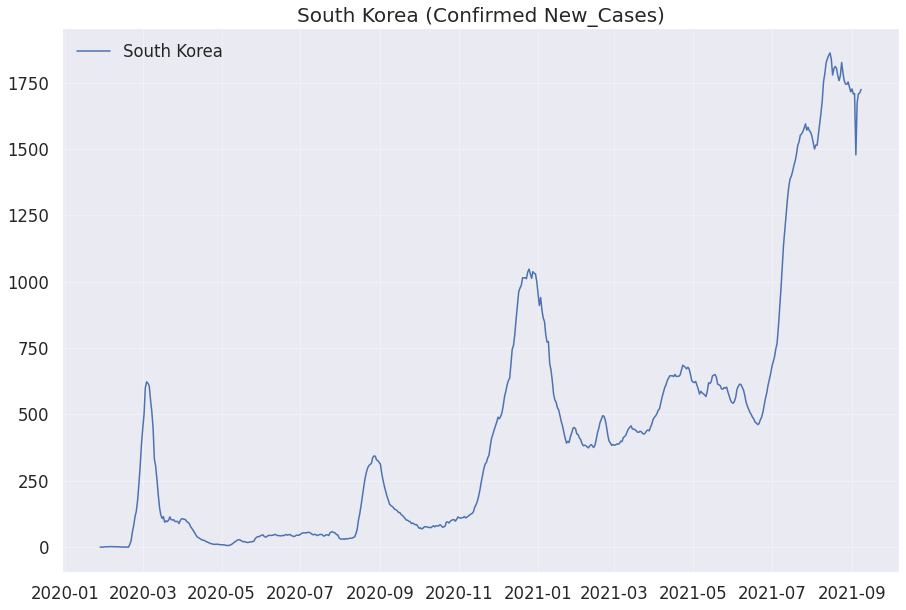

In [388]:
graph(new_gr_df[['South Korea']] ,"South Korea (Confirmed New_Cases)")

### 인구 대비

total_cases_per_million': 인구 대비 누적 확진자 비율

'new_cases_per_million': 인구 대비 신규 확진자 비율

'new_cases_smoothed_per_million': 인구 대비 일주일 평균 완치된 신규 확진자 비율

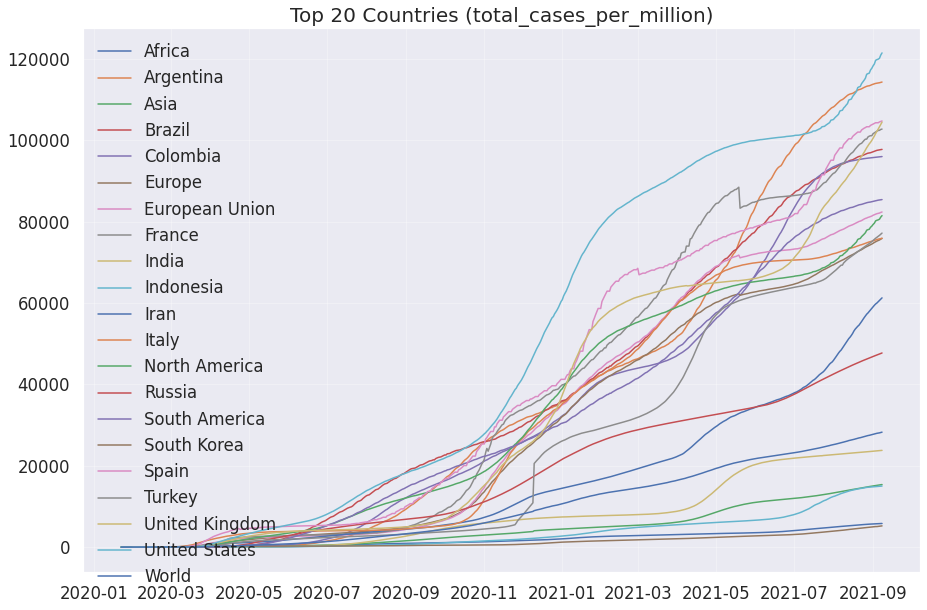

In [389]:
df = top20.pivot(index="date", columns="location", values="total_cases_per_million")
graph(df ,"Top 20 Countries (total_cases_per_million)")

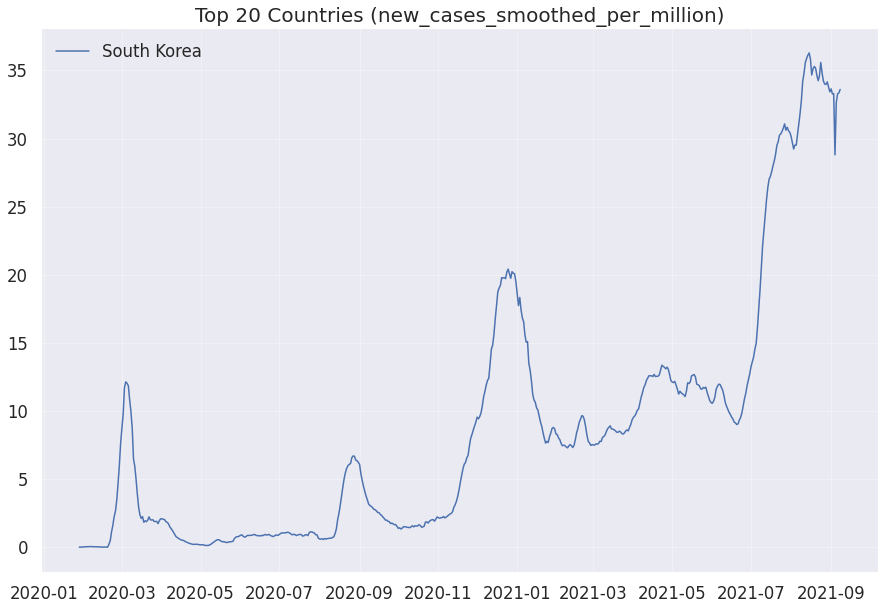

In [391]:
df = top20.pivot(index="date", columns="location", values="a")
graph(df[['South Korea']] ,"Top 20 Countries (new_cases_smoothed_per_million)")

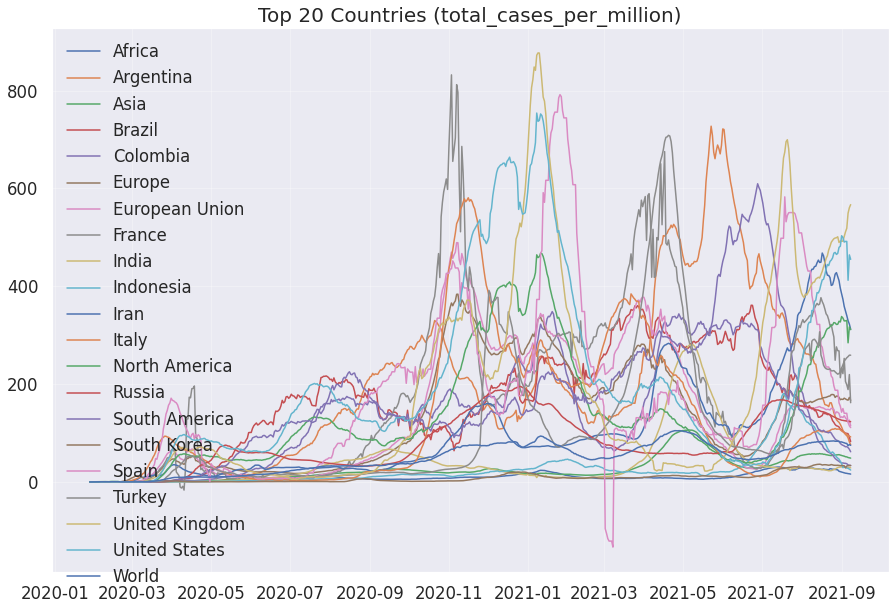

In [392]:
graph(df ,"Top 20 Countries (total_cases_per_million)")

## Confirmed deaths
- 'total_deaths': 누적 사망자 수
- 'new_deaths': 신규 사망자 수
- 'new_deaths_smoothed': 7일 완치된 사망자 수?
- 'total_deaths_per_million': 인구 대비 누적 사망자 수
- 'new_deaths_per_million': 인구 대비 신규 사망자 수
- 'new_deaths_smoothed_per_million': 인구 대비 신규 사망자 수 (7일 완치)

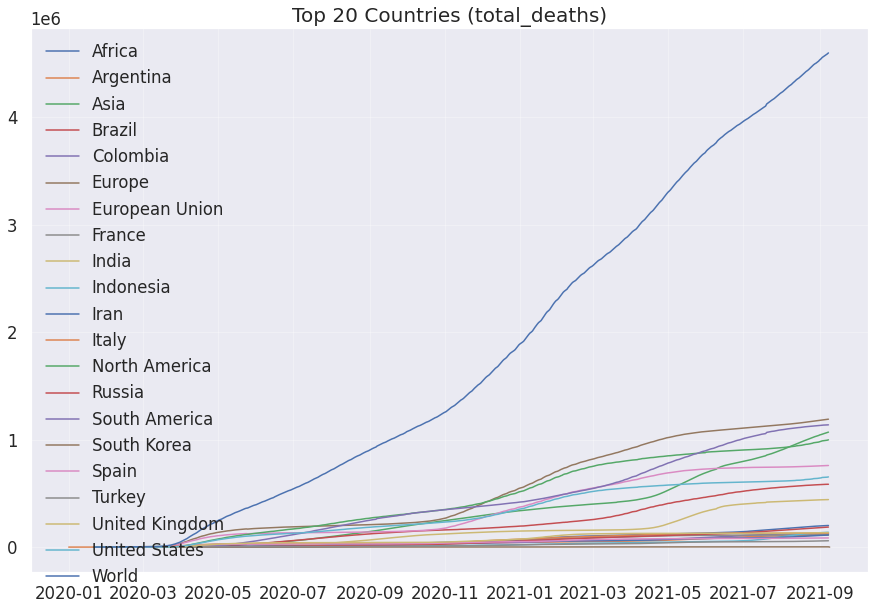

In [393]:
gr_df = top20.pivot(index="date", columns="location", values="total_deaths")
graph(gr_df ,"Top 20 Countries (total_deaths)")

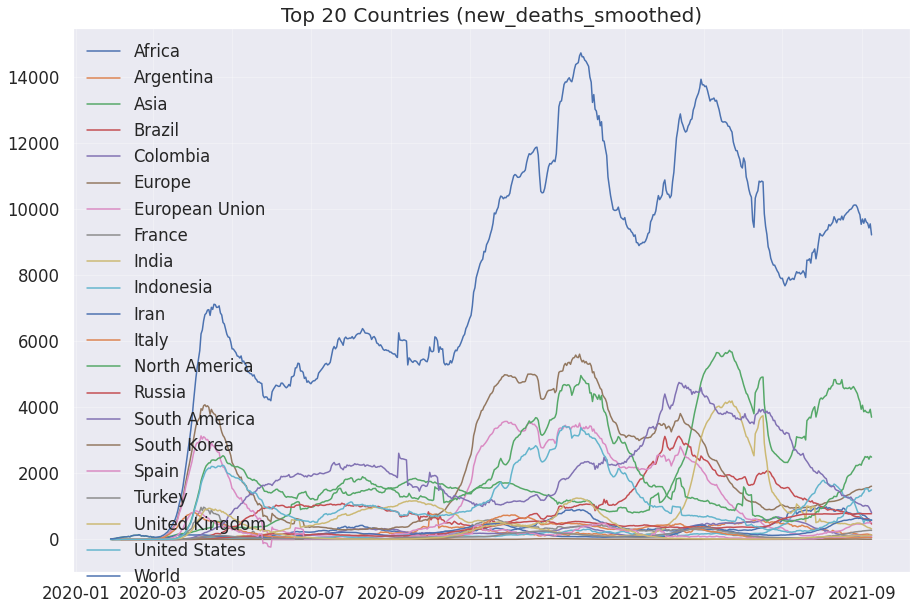

In [394]:
gr_df = top20.pivot(index="date", columns="location", values="new_deaths_smoothed")
graph(gr_df ,"Top 20 Countries (new_deaths_smoothed)")

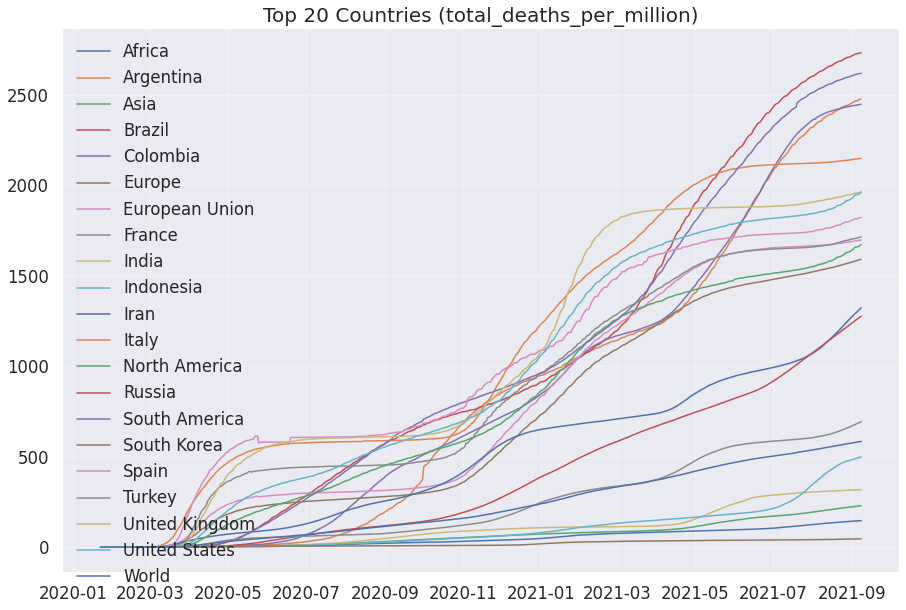

In [395]:
gr_df = top20.pivot(index="date", columns="location", values="total_deaths_per_million")
graph(gr_df ,"Top 20 Countries (total_deaths_per_million)")

## Hospital & ICU
- 'icu_patients': 중환자실에 있는 환자수
- 'icu_patients_per_million': 인구 대비 중환자실에 있는 환자수
- 'hosp_patients': 입원한 환자수
- 'hosp_patients_per_million': 인구 대비 입원한 환자 수
- 'weekly_icu_admissions': 중환자실에 입원한 환자 수(주단위)
- 'weekly_icu_admissions_per_million': 인구 대비 중환자실에 입원한 환자 수(주단위)
- 'weekly_hosp_admissions': 입원한 환자수(주단위)
- 'weekly_hosp_admissions_per_million': 인구 대비 입원한 환자수(주단위)

In [396]:
col = data[~data['icu_patients_per_million'].isnull()].location.unique().tolist()

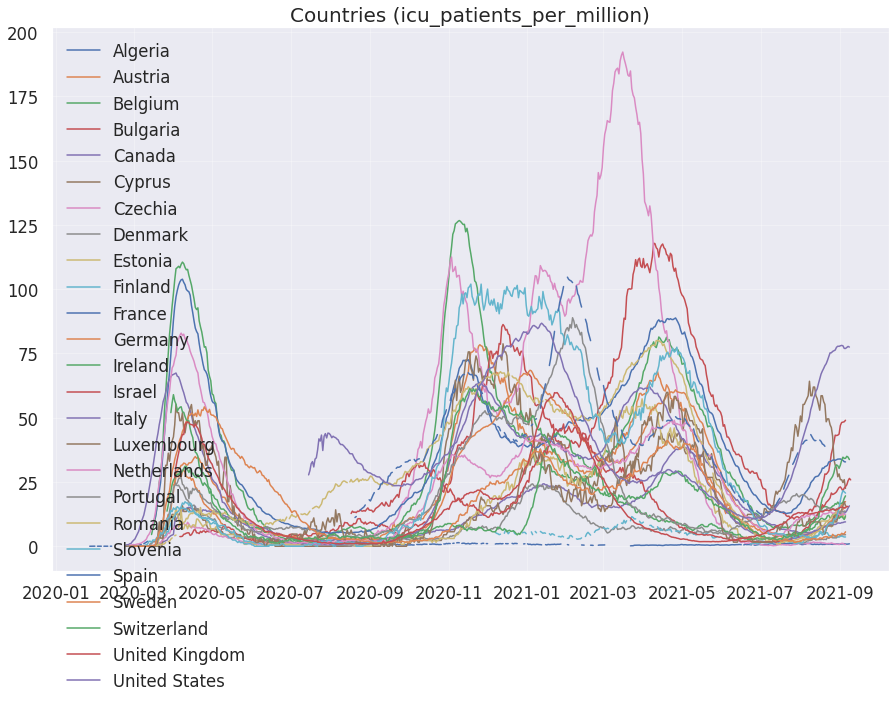

In [398]:
gr_df = data[data['location'].isin(col)].pivot(index="date", columns="location", values="icu_patients_per_million")
graph(gr_df ,"Countries (icu_patients_per_million)")

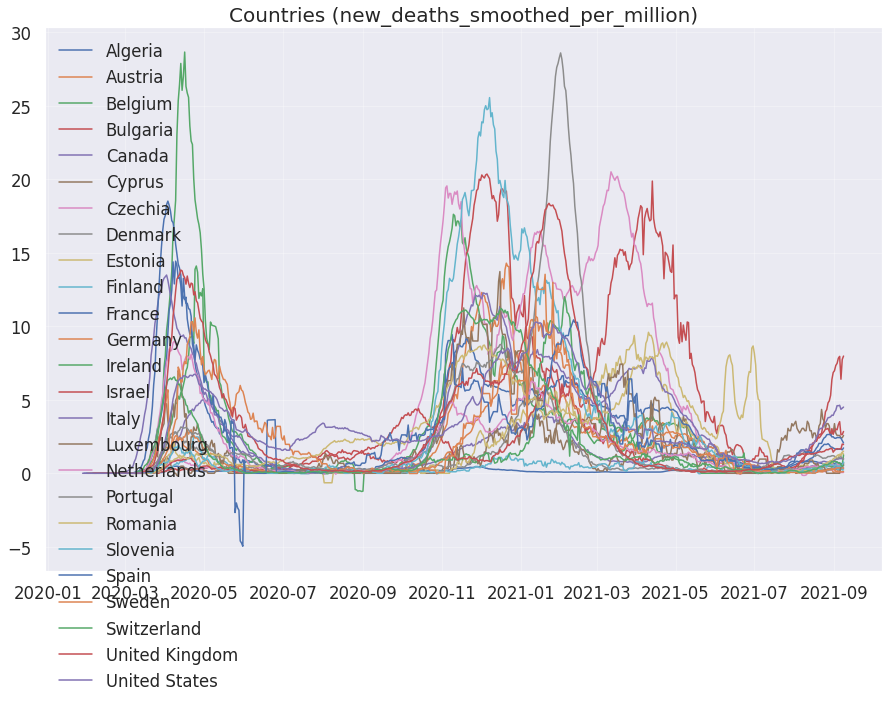

In [399]:
gr_df = data[data['location'].isin(col)].pivot(index="date", columns="location", values="new_deaths_smoothed_per_million")
graph(gr_df ,"Countries (new_deaths_smoothed_per_million)")

### 백신

In [ ]:
x= data.groupby("location")["total_vaccinations_per_hundred"].mean().sort_values(ascending= False).head(10)
plt.figure(figsize= (8,8))
ax= sns.barplot(x.values, x.index)
ax.set_xlabel("vaccinations per hundred")
plt.show()

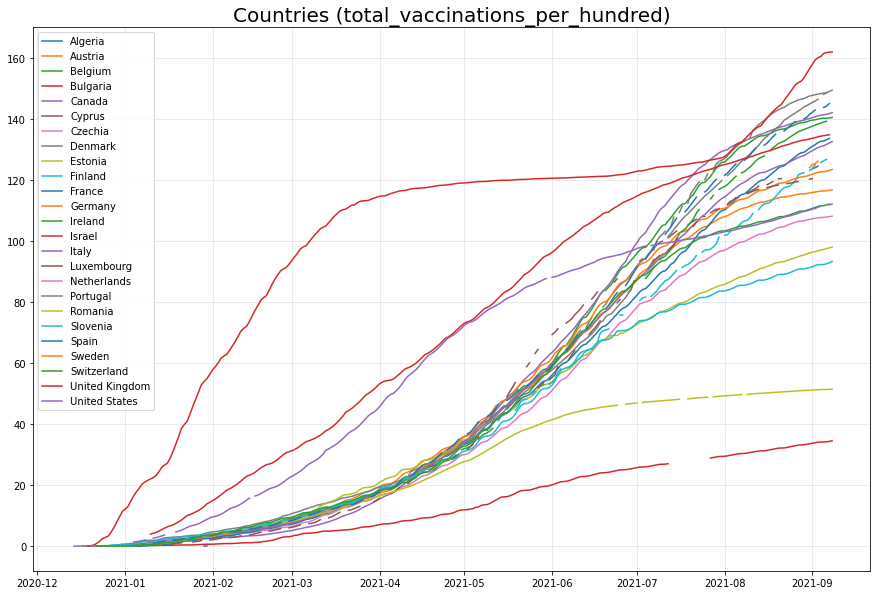

In [292]:
gr_df = data[data['location'].isin(col)].pivot(index="date", columns="location", values="total_vaccinations_per_hundred")
graph(gr_df ,"Countries (total_vaccinations_per_hundred)")

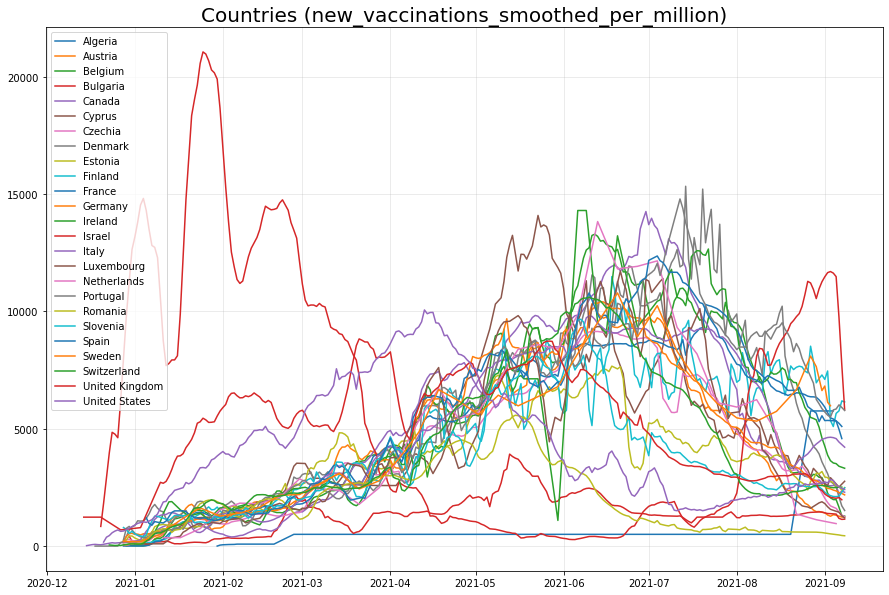

In [293]:
gr_df = data[data['location'].isin(col)].pivot(index="date", columns="location", values="new_vaccinations_smoothed_per_million")
graph(gr_df ,"Countries (new_vaccinations_smoothed_per_million)")

### 기타

In [46]:
grp = data.groupby('iso_code')
grp_cnt = pd.DataFrame(grp['total_cases'].count())

In [52]:
no_corona_cols = grp_cnt[grp_cnt['total_cases'] ==0].index.tolist()
no_corona = data[data['iso_code'].isin(no_corona_cols)]
corona = data[~data['iso_code'].isin(no_corona_cols)]

In [58]:
no_corona['population_density'].mean()

1880.8140240518196

In [59]:
corona['population_density'].mean()

348.2286968590847

In [77]:
corona[data['iso_code'].isin(top20_cols)]['population_density'].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



116.89223011573911

In [36]:
data[data['iso_code'] == 'ABW'].head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
5286,ABW,North America,Aruba,2021-03-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25766.0,15600.0,10166.0,NaN,NaN,NaN,24.04,14.55,9.48,NaN,NaN,67.59,107195.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN,NaN
5287,ABW,North America,Aruba,2021-03-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1278.0,NaN,NaN,NaN,NaN,11922.0,67.59,107195.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN,NaN
5288,ABW,North America,Aruba,2021-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1278.0,NaN,NaN,NaN,NaN,11922.0,67.59,107195.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN,NaN
5289,ABW,North America,Aruba,2021-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1278.0,NaN,NaN,NaN,NaN,11922.0,67.59,107195.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN,NaN
5290,ABW,North America,Aruba,2021-04-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1278.0,NaN,NaN,NaN,NaN,11922.0,67.59,107195.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN,NaN


In [17]:
AIA_data = data[data['iso_code']=='AIA']
AIA_data['total_cases'].unique()

array([nan])